In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import requests
import shutil
import bs4
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.by import By
import cv2
import time

In [89]:
#import excel that contains tiktok link
df_link = pd.read_excel('link tiktok.xlsx')

In [51]:
PATH = "C:\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(PATH)



#url that you want to scrape
link = 'https://www.tiktok.com/@dogcat_0327/video/7207585274312871211'

driver.get(link)

time.sleep(6) #nanti diganti tunggunya sampai captha nya nge load

#solver captcha
def down(image, xpath):
    #ambil link image
    captcha = driver.find_element (By.XPATH, xpath)
    src = captcha.get_attribute('src')

    #download image
    response = requests.get(src, stream=True)
    with open(image, 'wb') as out_file:
        shutil.copyfileobj(response.raw, out_file)
    del response

#download captcha image
down('captcha_img.jpeg', "//*[@id='captcha-verify-image']")
#download piece of captcha image
down('captcha_piece.jpeg', "//*[@id='tiktok-verify-ele']/div/div[2]/img[2]")



C:\Users\Public\Documents\iSkysoft\CreatorTemp\ipykernel_20280\885020288.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(PATH)


array([[[252, 181, 131],
        [252, 181, 131],
        [254, 183, 133],
        ...,
        [255, 202, 141],
        [255, 202, 141],
        [255, 202, 141]],

       [[252, 181, 131],
        [253, 182, 132],
        [254, 183, 133],
        ...,
        [255, 202, 141],
        [255, 202, 141],
        [255, 202, 141]],

       [[252, 181, 131],
        [253, 182, 132],
        [254, 183, 133],
        ...,
        [255, 202, 141],
        [255, 202, 141],
        [255, 202, 141]],

       ...,

       [[ 31,  73, 120],
        [ 61, 103, 150],
        [ 69, 111, 158],
        ...,
        [ 54, 113, 175],
        [ 51, 109, 174],
        [ 48, 109, 173]],

       [[ 43,  89, 137],
        [ 90, 136, 184],
        [ 31,  76, 127],
        ...,
        [ 66, 126, 186],
        [ 51, 110, 172],
        [ 57, 116, 178]],

       [[ 61, 108, 159],
        [ 59, 106, 157],
        [ 34,  81, 133],
        ...,
        [ 65, 123, 182],
        [ 36,  96, 156],
        [ 46, 106, 166]]

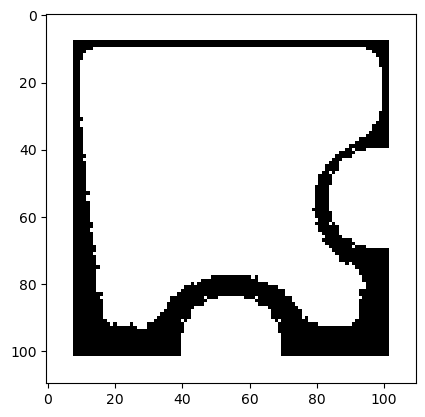

In [49]:
#read img
img = cv2.imread('captcha_img.jpeg')
img_piece = cv2.imread('captcha_piece.jpeg')

#SHAPE MATCHING FUNCTION
def bin_img(image):
    img = cv2.imread(image)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    binary_img = cv2.threshold(img_gray, 242, 255, cv2.THRESH_BINARY_INV)[1]
    plt.imshow(binary_img, cmap='gray')

    return binary_img

capt = bin_img('captcha_img.jpeg')
piece = bin_img('captcha_piece.jpeg')

#matching shape
match = cv2.matchTemplate(capt, piece, cv2.TM_CCOEFF)

#check x, y in maximum value
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(match)

#width and height
w = piece.shape[1]
h = piece.shape[0]



In [50]:
#drag slider ke x yang tepat
slide = driver.find_element(By.XPATH, "//*[@id='secsdk-captcha-drag-wrapper']/div[2]")
move = webdriver.ActionChains(driver)

move.click_and_hold(slide).move_by_offset((85*max_loc[0])/138, 0).release().perform()


In [ ]:
#export hasil scrape tiktok
df_result.to_excel('hasil scrape data tiktok.xlsx', index=False)

# coret2an

In [20]:
#untuk membersihkan link yg di profile sebelum disamakan dengan link yg kita punya
c = 'https://www.tiktok.com/@dndalstri._/video/7233570284572249370?is_from_webapp=1&sender_device=pc&web_id=7205425525594031618'
c[:c.find('?')]

'https://www.tiktok.com/@dndalstri._/video/7233570284572249370'

## Prototype

In [ ]:
PATH = "C:\chromedriver_win32\chromedriver.exe"
driver = webdriver.Chrome(PATH)

#list kosong
link = []
judul = []
username = []
likes = []
views = []
comment = []
share = []

#ambil url yang ingin di scrape
for i in range(len(df_link.iloc[:,0])):
    link = df_link.iloc[i,0]

    driver.get("link")

    time.sleep(10)

    #ada captcha solver nanti disini

    time.sleep(2)

    #exit login bar
    ext = driver.find_element(By.XPATH, "//*[@id='login-modal']/div[2]/svg")
    ext.click()

    time.sleep(2)

    #buka profile
    element = driver.find_element(By.XPATH, "//*[@id='main-content-video_detail']/div/div[2]/div[1]/div[2]/div/a[2]/span[1]")
    element.click()

    time.sleep(2)
    #nanti ada scroll down dulu sampai abis baru naek ke atas lagi setelah itu baru looping dalamnya

    #looping didalem profile mereka samapi ketemu link yang sama
    for j in range():
        wad
        

#Hasil data yang di ambil
df_result = pd.DataFrame(list(zip(link, judul, username, likes, views, comment, share)), columns=['link'. 'judul', 'username', 'likes', 'views', 'comment', 'share'])

#keluar chrome
#driver.quit()